In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Preparing the data that filled null data by interpolatation. 

In [ ]:
df = pd.read_table('drive/MyDrive/Colab Notebooks/data')
df_pivot = pd.pivot_table(df, values = 'value', index = 'field', columns = 'id')
df_pivot.interpolate(limit_direction='both', axis = 1, inplace = True)
df_pivot.head()

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048
field,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.0,3.0,0.0,11.0,1.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,14.0,8.0,16.0,7.0,0.0,5.0,4.333333,3.666667,3.0,4.0,0.0,2.0,0.0,0.0,18.0,0.0,4.0,2.0,0.0,...,1.0,1.0,0.0,6.0,2.0,3.0,7.0,2.0,13.0,22.0,12.0,10.000000,20.000000,3.0,1.5,0.0,8.0,2.0,0.0,0.0,6.333333,12.666667,19.0,56.0,6.0,12.0,28.0,18.0,8.0,7.5,7.0,2.0,5.0,6.0,6.333333,6.666667,7.0,8.0,22.0,5.0
1,147.0,10.0,0.0,38.0,1.0,0.0,26.0,2.0,0.0,0.0,1.0,3.0,5.0,5.0,0.0,0.0,1.0,2.0,142.0,1.0,1.0,12.0,4.0,7.0,10.0,0.0,10.0,0.000000,0.000000,9.0,7.0,1.0,5.0,0.0,2.0,28.0,1.0,5.0,5.0,0.0,...,2.0,7.0,7.0,7.0,10.0,5.0,3.5,2.0,20.5,39.0,14.0,21.000000,47.000000,5.0,12.0,4.0,18.0,6.0,0.0,1.0,2.000000,17.000000,32.0,121.0,4.0,6.0,32.0,11.0,10.0,4.0,27.0,24.0,21.0,6.0,11.000000,10.000000,6.0,11.0,9.0,7.0
2,158.0,6.0,0.0,20.0,0.0,0.0,28.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.0,31.0,4.0,23.0,1.0,2.0,7.0,0.000000,4.500000,9.0,5.0,1.0,4.0,0.0,2.0,21.0,4.0,3.0,1.5,0.0,...,3.0,3.0,8.5,14.0,5.0,5.0,8.0,2.0,17.0,28.0,17.0,11.333333,5.666667,0.0,11.0,2.0,8.0,10.0,0.0,1.0,7.000000,9.000000,35.0,47.0,2.0,19.0,19.5,20.0,12.5,5.0,35.0,2.0,17.0,1.0,17.000000,11.000000,15.0,16.0,31.0,11.0
3,148.0,6.0,0.0,22.0,3.0,1.0,29.0,1.0,0.0,0.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,4.0,49.0,24.5,0.0,25.0,2.0,34.0,18.5,3.0,1.5,0.000000,0.000000,7.0,9.0,0.0,0.0,2.0,2.0,21.0,12.0,3.0,3.0,1.0,...,1.0,2.0,3.0,6.0,14.0,1.0,8.0,12.5,17.0,25.0,15.0,12.000000,38.000000,4.0,8.0,1.0,19.0,3.0,0.0,2.0,1.000000,3.000000,40.0,68.0,11.0,8.0,57.0,22.0,14.0,5.0,45.0,4.0,13.0,2.0,12.000000,14.000000,12.0,15.0,46.0,8.0
4,143.0,7.0,0.0,12.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,8.0,2.0,1.0,0.0,0.0,0.0,1.0,117.0,0.0,0.0,42.0,8.0,24.0,7.0,0.0,14.0,0.000000,1.000000,4.0,4.0,1.0,0.0,2.0,2.0,18.0,1.0,1.5,2.0,0.0,...,1.0,0.0,1.0,6.0,7.0,4.0,9.0,0.0,15.0,18.0,15.0,12.000000,24.000000,4.0,10.0,3.0,18.0,10.0,0.0,1.0,2.000000,3.000000,24.0,49.0,0.0,11.0,20.0,13.0,9.0,3.0,26.0,0.0,14.0,1.0,16.000000,13.000000,23.0,9.0,17.0,4.0


In [ ]:
data_filled = np.array(df_pivot)
data_filled.shape

(508, 3049)

Split up the data into training, validation and test sets.

In [ ]:
data_train = data_filled[:, :2001]
data_valid = data_filled[:, 2001:2501]
data_test = data_filled[:, 2501:]

X_train, y_train = data_train[:-1, :], data_train[-1, :]
X_valid, y_valid = data_valid[:-1, :], data_valid[-1, :]
X_test, y_test = data_test[:-1, :], data_test[-1, :]
X_train = X_train.T
X_valid = X_valid.T
X_test = X_test.T

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(2001, 507)
(2001,)
(500, 507)
(500,)
(548, 507)
(548,)


Trainig and fit with LinearRegression.


In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R squared.

In [ ]:
print("R2_valid = ",lr.score(X_valid, y_valid))
print("R2_test = ", lr.score(X_test, y_test))

R2_valid =  0.861679158348367
R2_test =  0.8266257263423601


Mean square error.

In [ ]:
y_valid_pred = lr.predict(X_valid)
print("MSE_valid = ",np.mean((y_valid_pred - y_valid)*(y_valid_pred - y_valid)))
y_test_pred = lr.predict(X_test)
print("MSE_test = ",np.mean((y_test_pred - y_test)*(y_test_pred - y_test)))

MSE_valid =  186.07757234666386
MSE_test =  121.71242289074868


Create a scatterplot of the real test values versus the predicted values. 

Text(0, 0.5, 'Predicted Y')

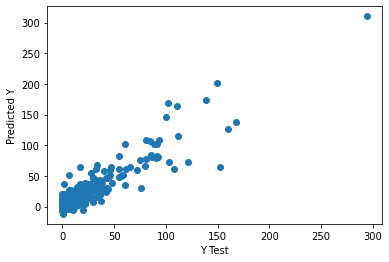

In [ ]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')